In [121]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
resultDatasetPath = "../dataset/no_outliers.h5"

In [3]:
%%time
datasetPath = "../dataset/users_clean_with_indicators_with_outliers.h5"
df_users = pd.read_hdf(datasetPath)

CPU times: user 116 ms, sys: 27.2 ms, total: 143 ms
Wall time: 169 ms


In [38]:
%%time
datasetTweetsCleanedPath = "../dataset/tweets_clean_with_outliers.h5"
df_tweets = pd.read_hdf(datasetTweetsCleanedPath)

CPU times: user 7.5 s, sys: 7.06 s, total: 14.6 s
Wall time: 15.5 s


In [5]:
# compute the interquartile range and set the median to df.attr of the outliers 
def compute_outliers(df, attr):
    Q1 = df[attr].quantile(0.25)
    Q3 = df[attr].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range
    print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)
    #filter = (df[attr] >= Q1 - 1.5 * IQR) & (df[attr] <= Q3 + 1.5 * IQR)
    #valid = df.loc[filter]
    filter = (df[attr] < Q1 - 1.5 * IQR) | (df[attr] > Q3 + 1.5 * IQR)
    outliers = df.loc[filter]
    
    print("We have", len(outliers), "outliers over", len(df), "entries (", (len(outliers) / len(df)) * 100, "%)")
    
    return outliers

In [98]:
def hist(df, column):
    numberOfBins = int(np.log2(len(df[column][df[column].notna()])) + 1)
    print("Number of bins:", numberOfBins)
    df[column].hist(stacked=True, bins=numberOfBins)
    plt.yscale('log')
    plt.ylabel("count")
    plt.title(column)
    plt.show()

def boxplot(df, column):
    df.boxplot(column=column)
    plt.show()

def display_plots(df, column):
    numberOfBins = int(np.log2(len(df[column][df[column].notna()])) + 1)
    print("Number of bins:", numberOfBins)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    df.boxplot(column=column, ax=ax1)
    df.hist(column=column, ax=ax2, stacked=True, bins=numberOfBins)
    ax2.set_yscale('log')
    #fig.subplots_adjust(wspace=0.3)
    plt.show()

def log_scale(df, column):
    return pd.DataFrame(np.log10(1+df[column][df[column].notna()]))

def analyze_outliers(df, column):
    display_plots(df, column)

    # compute outliers
    outliers = compute_outliers(df, column)
    minOutlierValue = df.loc[outliers.index][column].min()
    maxOutlierValue = df.loc[outliers.index][column].max()
    print("Min outlier:", minOutlierValue, "   Max outlier:", maxOutlierValue)

    print("\n\nLog scale")
    column_log_scale = log_scale(df, column)
    display_plots(column_log_scale, column)

    # compute outliers from log scale
    log_outliers = compute_outliers(column_log_scale, column)
    minOutlierValue = df.loc[log_outliers.index][column].min()
    maxOutlierValue = df.loc[log_outliers.index][column].max()
    print("Min outlier:", minOutlierValue, "   Max outlier:", maxOutlierValue)

    return outliers

def fill_outliers(df, column, outliers):
    df.loc[outliers.index, column] = np.nan
    df[column].fillna(df.groupby(["bot"])[column].transform(lambda x: np.nanmedian(x)), inplace=True)
    print("Median:")
    print(df.groupby(["bot"])[column].apply(lambda x: np.nanmedian(x)))

In [62]:
df_users.dtypes

name                                 object
lang                                 object
bot                                   int64
created_at                   datetime64[ns]
statuses_count                      float64
tweet_count                           int64
retweet_count_avg                   float64
reply_count_avg                     float64
favorite_count_avg                  float64
num_hashtags_avg                    float64
num_urls_avg                        float64
num_mentions_avg                    float64
tweet_length_avg                    float64
num_special_chars_avg               float64
retweet_count_entropy               float64
reply_count_entropy                 float64
favorite_count_entropy              float64
num_hashtags_entropy                float64
num_urls_entropy                    float64
num_mentions_entropy                float64
tweet_length_entropy                float64
num_special_chars_entropy           float64
dtype: object

In [ ]:
df_users.describe()

Number of bins: 14


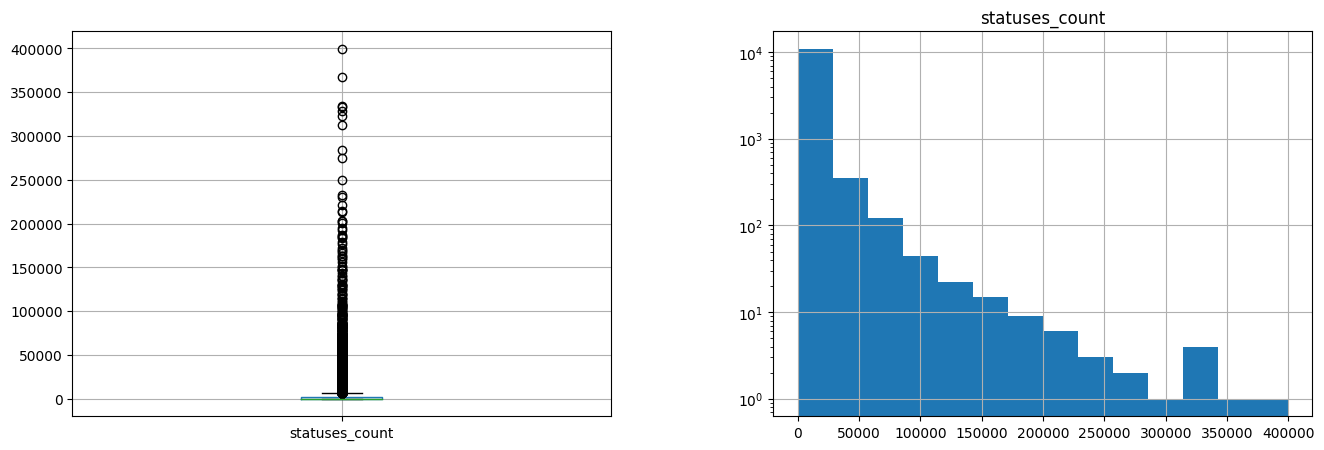

Q1: 42.0 Q3: 2520.25 IQR: 2478.25
We have 2205 outliers over 11508 entries ( 19.16058394160584 %)
Min outlier: 6244.0    Max outlier: 399555.0


Log scale
Number of bins: 14


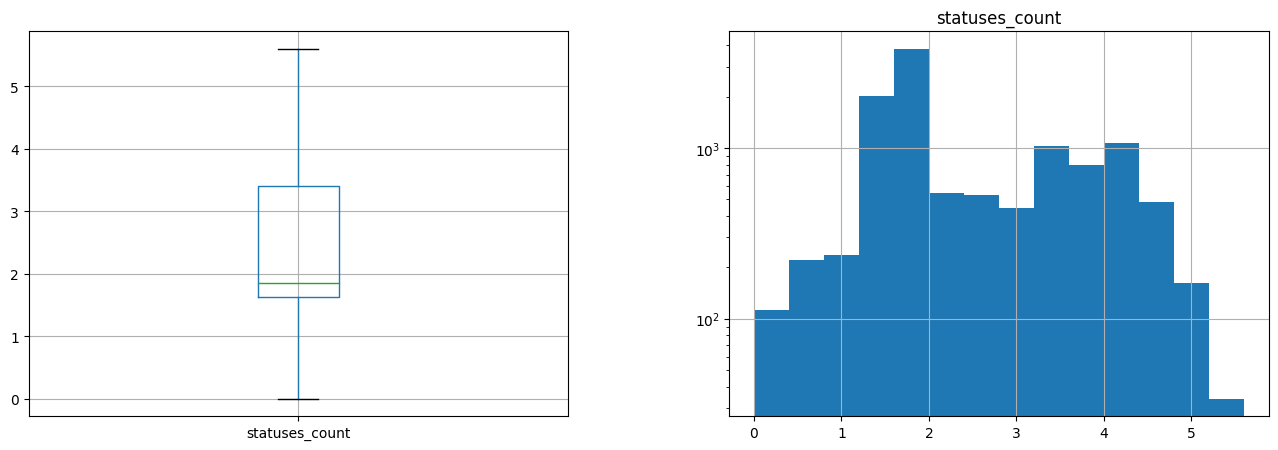

Q1: 1.6334684555795866 Q3: 3.4016159048166004 IQR: 1.7681474492370137
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [63]:
outliers = analyze_outliers(df_users, "statuses_count")

In [66]:
fill_outliers(df_users, "statuses_count", outliers)

Number of bins: 14


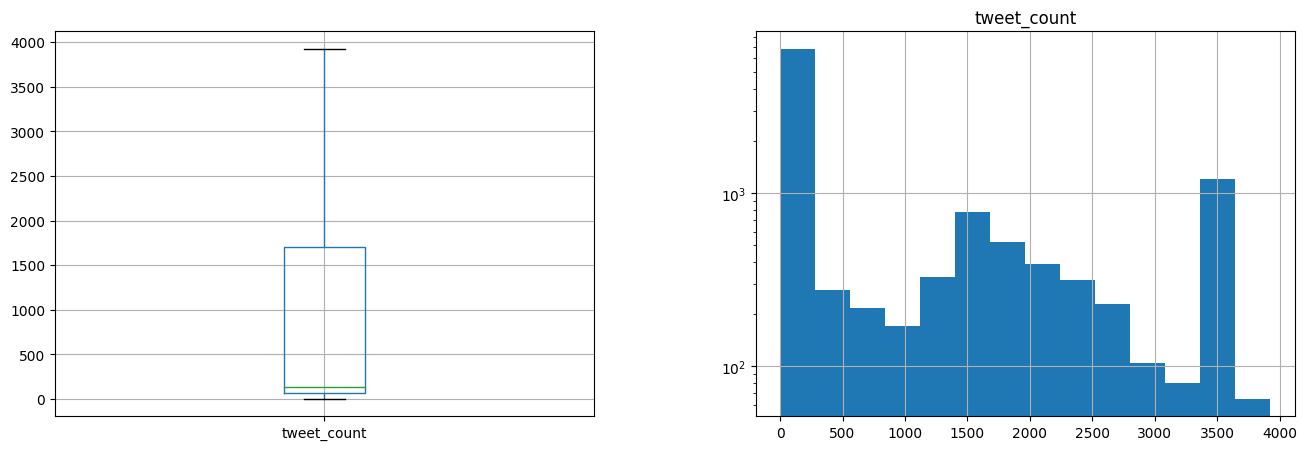

Q1: 65.0 Q3: 1700.0 IQR: 1635.0
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


Log scale
Number of bins: 14


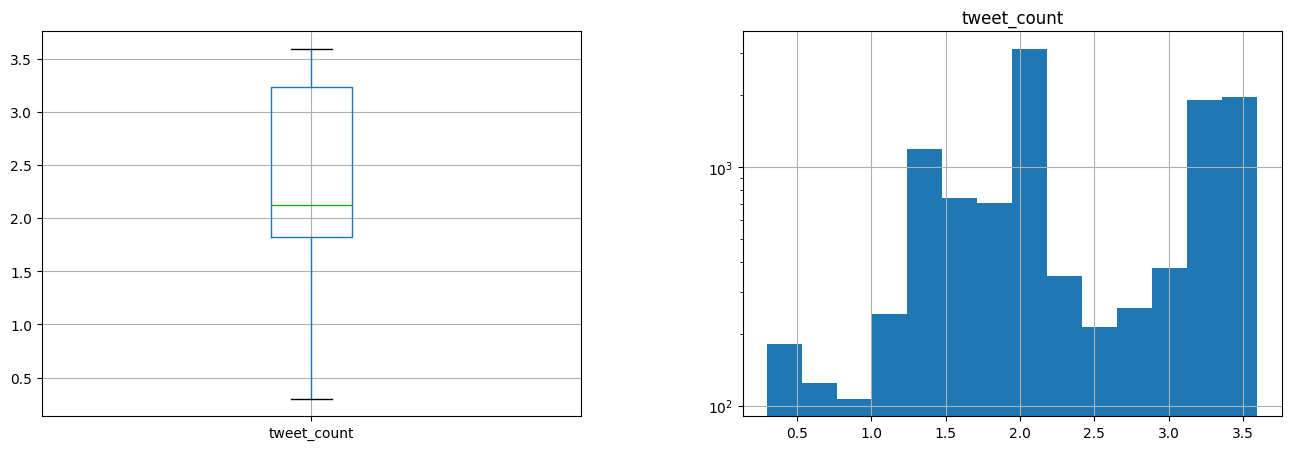

Q1: 1.8195439355418688 Q3: 3.230704313612569 IQR: 1.4111603780707003
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [73]:
outliers = analyze_outliers(df_users, "tweet_count")

In [74]:
df_users.tweet_count.describe()

count    11508.000000
mean       940.685871
std       1227.536451
min          1.000000
25%         65.000000
50%        132.000000
75%       1700.000000
max       3926.000000
Name: tweet_count, dtype: float64

Number of bins: 14


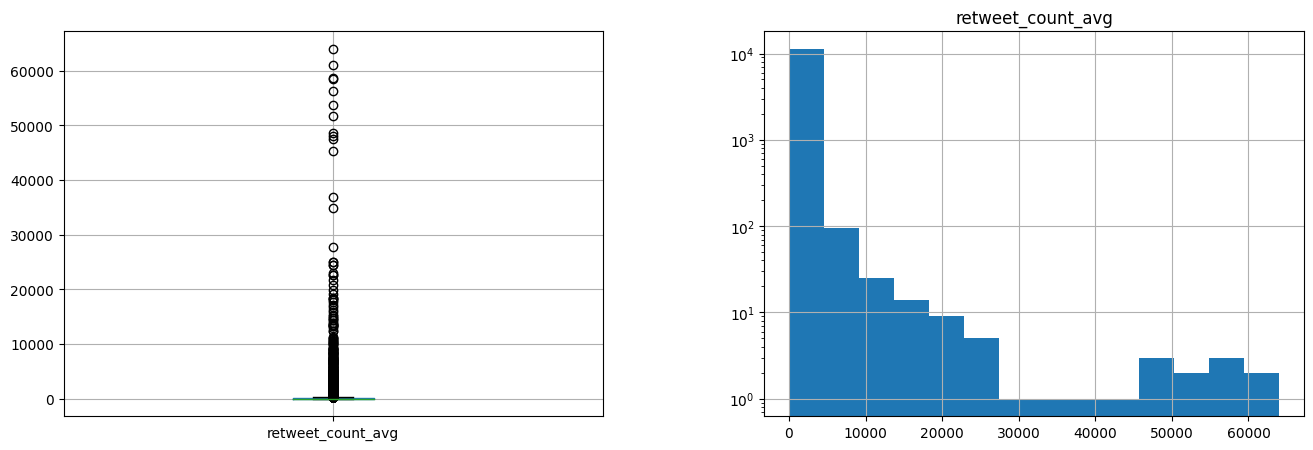

Q1: 0.023809523809523808 Q3: 117.47422707889126 IQR: 117.45041755508174
We have 1906 outliers over 11508 entries ( 16.562391379909627 %)
Min outlier: 294.32608695652175    Max outlier: 63995.21428571428


Log scale
Number of bins: 14


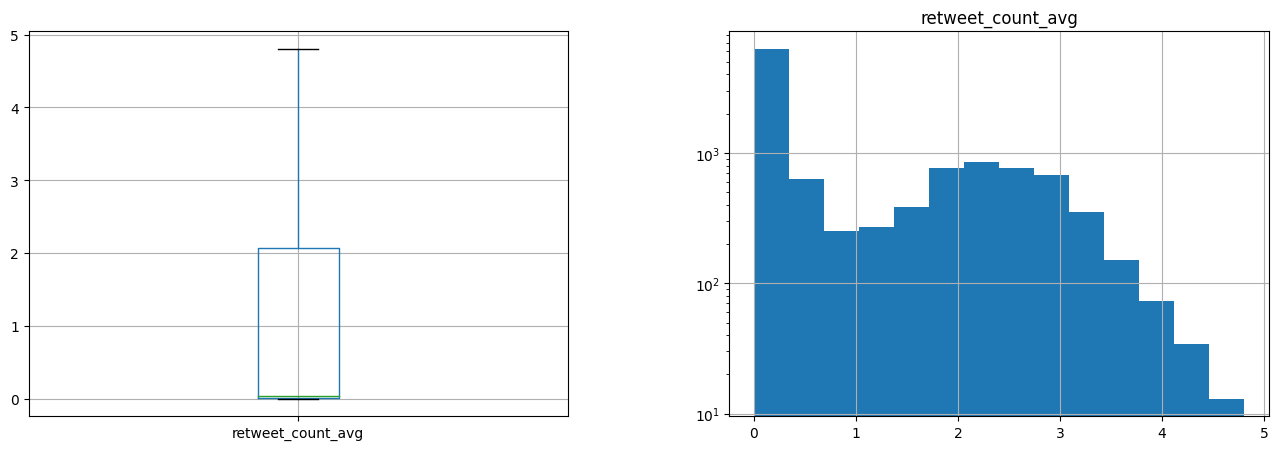

Q1: 0.010219165181686028 Q3: 2.0736238645689657 IQR: 2.06340469938728
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [75]:
outliers = analyze_outliers(df_users, "retweet_count_avg")

In [76]:
fill_outliers(df_users, "retweet_count_avg", outliers)

Median of real users:                               name lang  bot          created_at  \
2.199063e+09                    qq   en    0 2018-11-19 06:58:18   
3.118660e+09        charlotte gray   en    0 2020-03-31 21:19:59   
2.744812e+09             ♛jay bae♛   en    0 2019-08-18 21:48:35   
2.349867e+09             francis g   en    0 2019-02-20 09:53:17   
2.534777e+08                   ttt   en    0 2016-02-19 09:50:22   
...                            ...  ...  ...                 ...   
7.972501e+08                fabian   en    0 2017-09-04 01:29:15   
1.766882e+08  gianraoúl dla sierra   es    0 2015-08-12 04:55:53   
2.911862e+09    madrid lae maika .   en    0 2019-11-29 13:16:02   
1.378533e+09             clau sato   en    0 2018-04-27 03:01:58   
9.331834e+08              corvanna   en    0 2017-11-09 23:24:16   

              statuses_count  tweet_count  retweet_count_avg  reply_count_avg  \
2.199063e+09           297.0         2004           4.146262              0.0   

/tmp/ipykernel_10922/2288347917.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Median of real users:", df.loc[outliers.index][df.bot == 0])
/tmp/ipykernel_10922/2288347917.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Median of bots:      ", df.loc[outliers.index][df.bot == 1])


Number of bins: 14


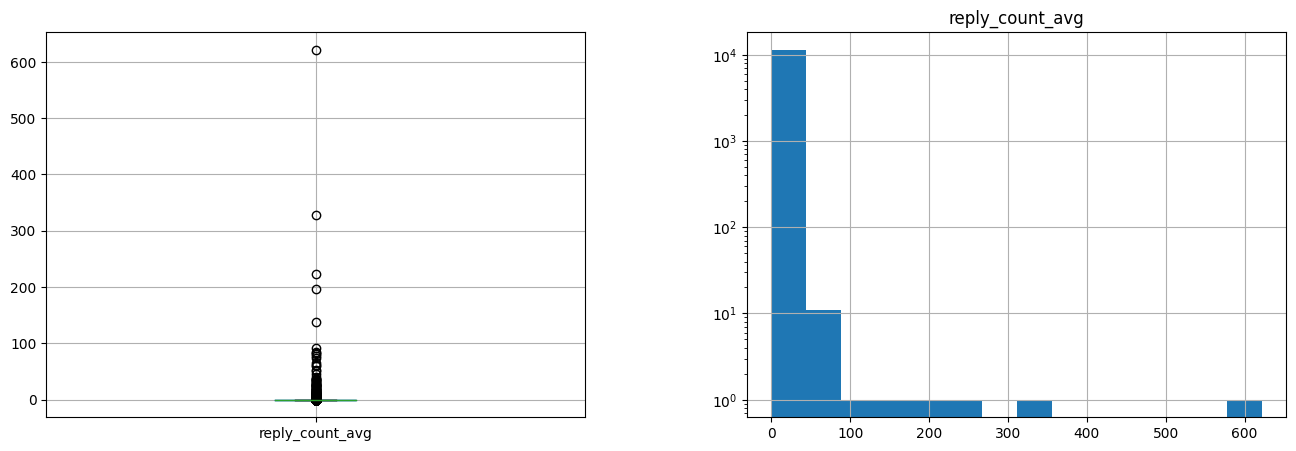

Q1: 0.0 Q3: 0.0 IQR: 0.0
We have 2291 outliers over 11508 entries ( 19.907890163364616 %)
Min outlier: 0.0005603810591202018    Max outlier: 621.6666666666666


Log scale
Number of bins: 14


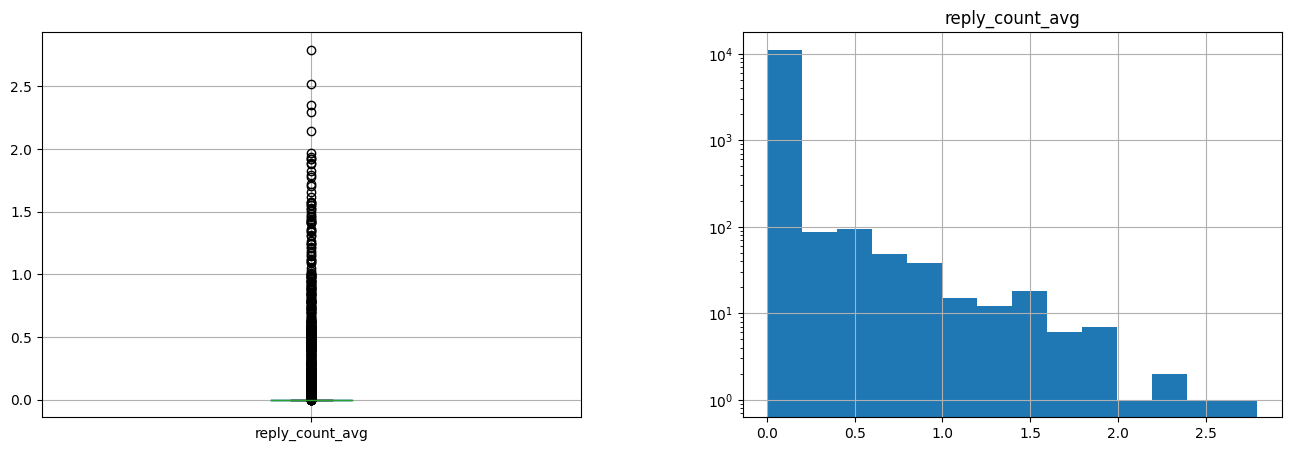

Q1: 0.0 Q3: 0.0 IQR: 0.0
We have 2291 outliers over 11508 entries ( 19.907890163364616 %)
Min outlier: 0.0005603810591202018    Max outlier: 621.6666666666666


In [86]:
outliers = analyze_outliers(df_users, "reply_count_avg")

In [97]:
fill_outliers(df_users, "reply_count_avg", outliers)

Median:


Number of bins: 14


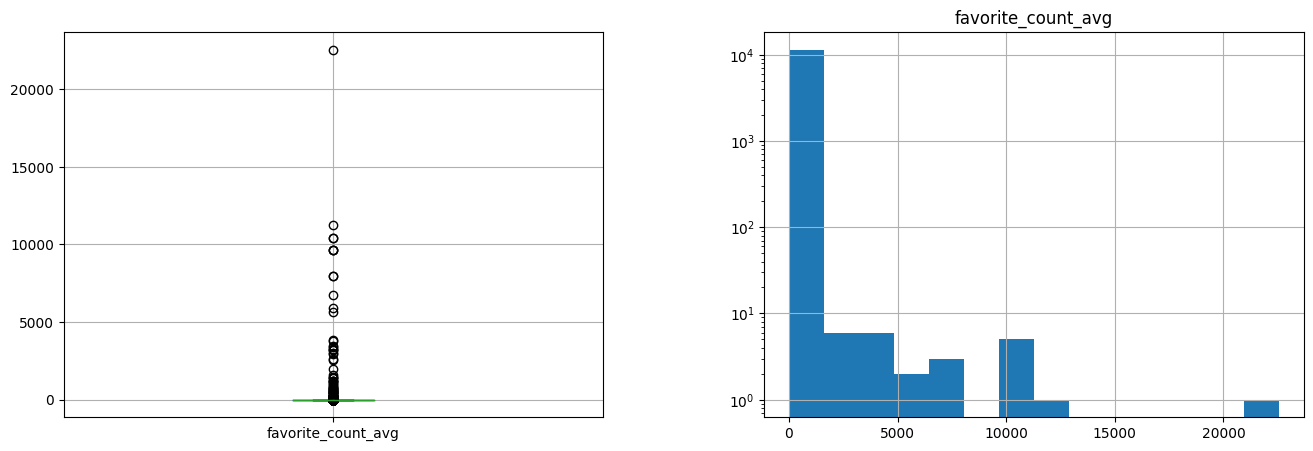

Q1: 0.024030501782985228 Q3: 0.269264639567094 IQR: 0.2452341377841088
We have 1608 outliers over 11508 entries ( 13.97288842544317 %)
Min outlier: 0.637240356083086    Max outlier: 22559.916666666668


Log scale
Number of bins: 14


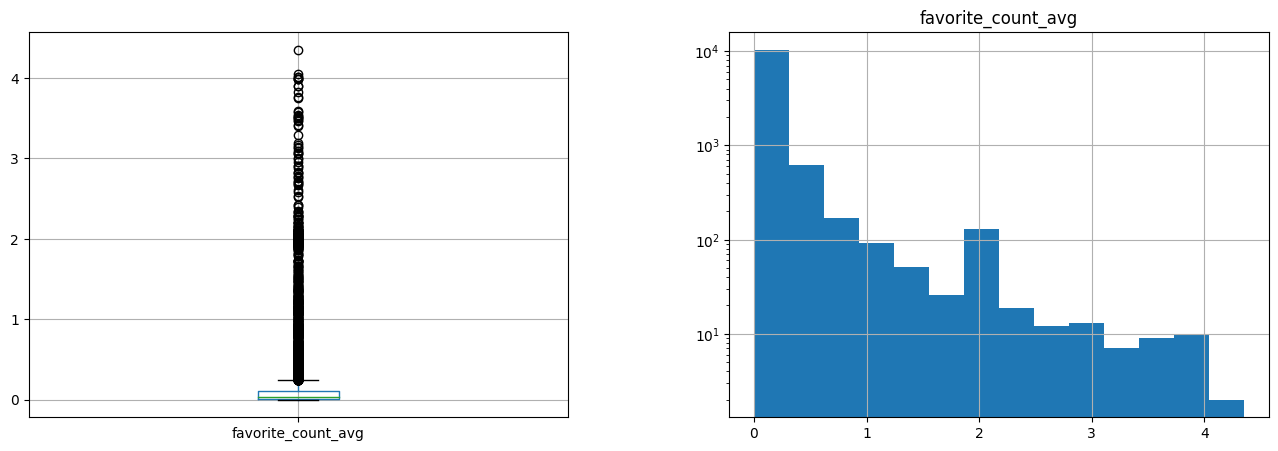

Q1: 0.01031289269298401 Q3: 0.10355218114936338 IQR: 0.09323928845637937
We have 1448 outliers over 11508 entries ( 12.582551268682657 %)
Min outlier: 0.752405949256343    Max outlier: 22559.916666666668


In [99]:
outliers = analyze_outliers(df_users, "favorite_count_avg")

In [100]:
fill_outliers(df_users, "favorite_count_avg", outliers)

Median:
bot
0    0.081053
1    0.039216
Name: favorite_count_avg, dtype: float64


Number of bins: 14


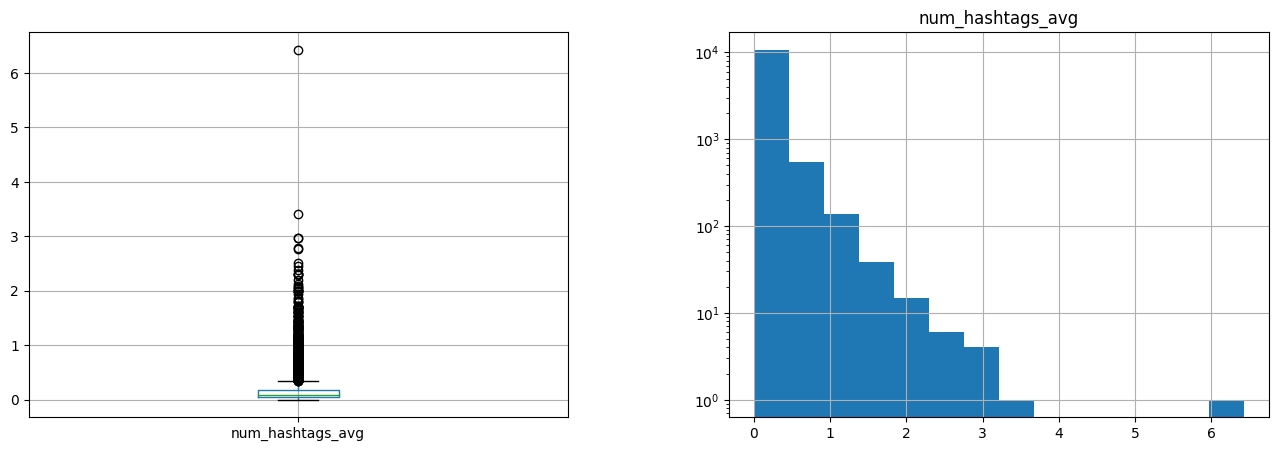

Q1: 0.05 Q3: 0.1703129268218654 IQR: 0.12031292682186541
We have 1147 outliers over 11508 entries ( 9.966979492526939 %)
Min outlier: 0.3510054844606947    Max outlier: 6.430140098447557


Log scale
Number of bins: 14


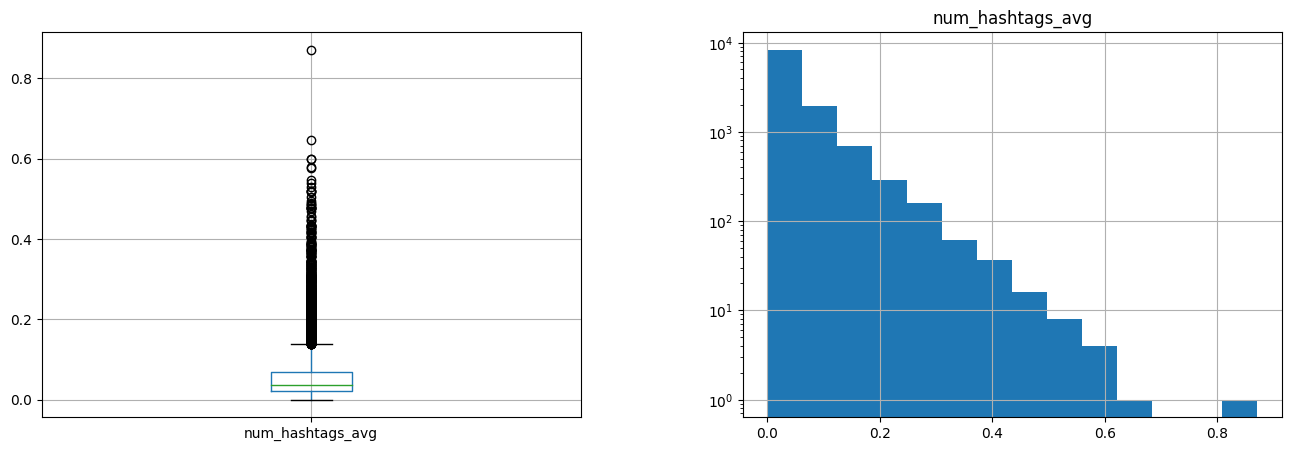

Q1: 0.021189299069938092 Q3: 0.0683019973349536 IQR: 0.047112698265015504
We have 1023 outliers over 11508 entries ( 8.889468196037539 %)
Min outlier: 0.3771769019248396    Max outlier: 6.430140098447557


In [101]:
outliers = analyze_outliers(df_users, "num_hashtags_avg")

In [102]:
fill_outliers(df_users, "num_hashtags_avg", outliers)

Median:
bot
0    0.085106
1    0.073373
Name: num_hashtags_avg, dtype: float64


Number of bins: 14


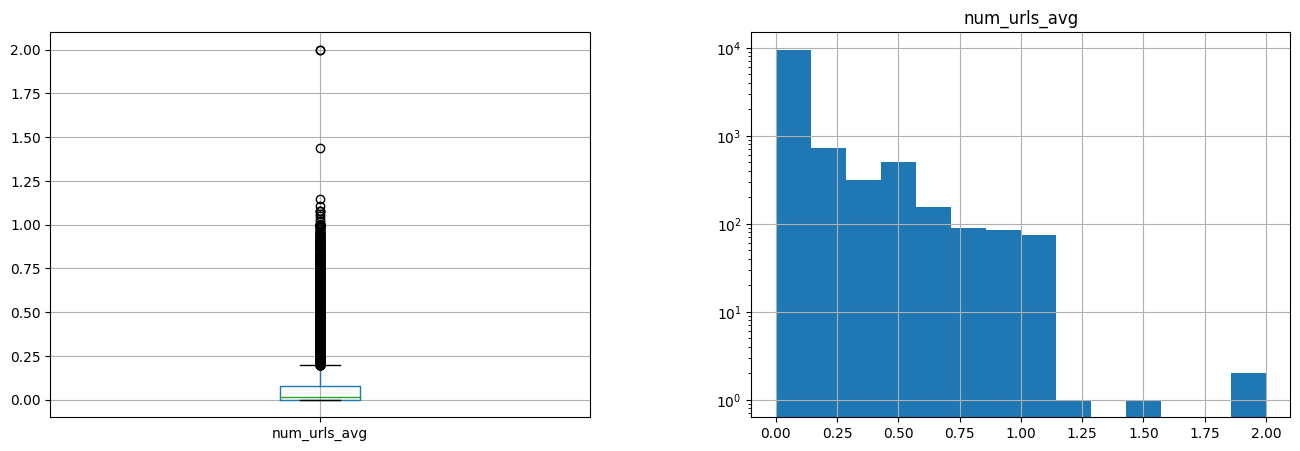

Q1: 0.0 Q3: 0.07811594439019565 IQR: 0.07811594439019565
We have 1591 outliers over 11508 entries ( 13.825165102537365 %)
Min outlier: 0.19533029612756264    Max outlier: 2.0


Log scale
Number of bins: 14


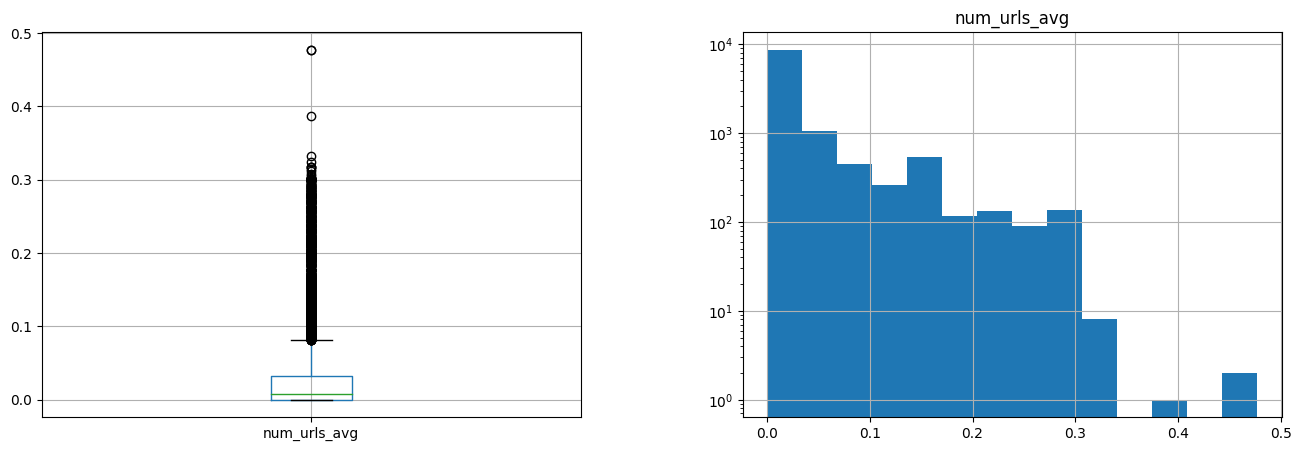

Q1: 0.0 Q3: 0.03266546886144799 IQR: 0.03266546886144799
We have 1524 outliers over 11508 entries ( 13.242961418143901 %)
Min outlier: 0.20703346568349404    Max outlier: 2.0


In [103]:
outliers = analyze_outliers(df_users, "num_urls_avg")

In [104]:
fill_outliers(df_users, "num_urls_avg", outliers)

Median:
bot
0    0.029075
1    0.000000
Name: num_urls_avg, dtype: float64


Number of bins: 14


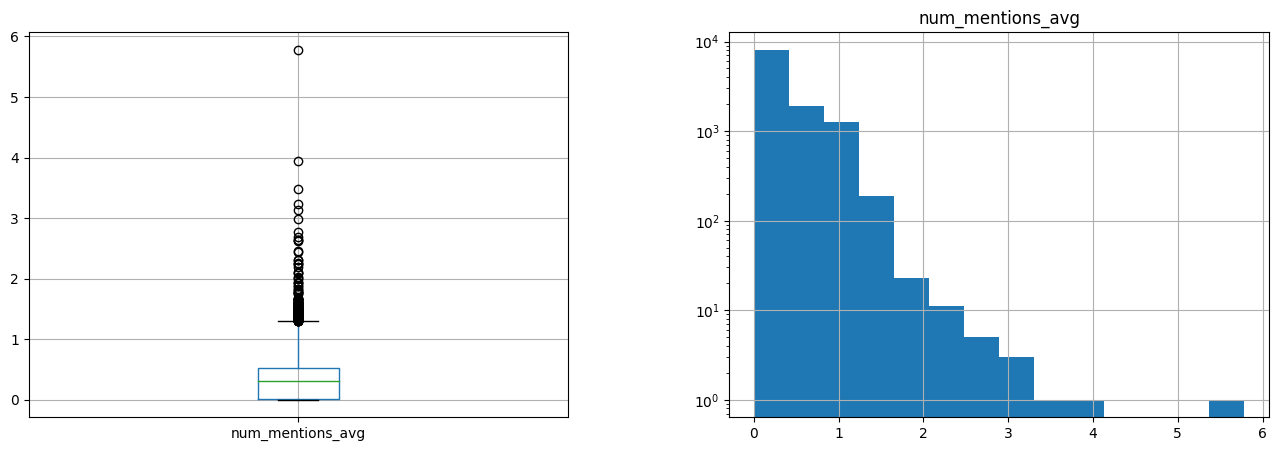

Q1: 0.010622613226408346 Q3: 0.5249560558360283 IQR: 0.51433344260962
We have 182 outliers over 11508 entries ( 1.5815085158150852 %)
Min outlier: 1.2972237343494828    Max outlier: 5.782608695652174


Log scale
Number of bins: 14


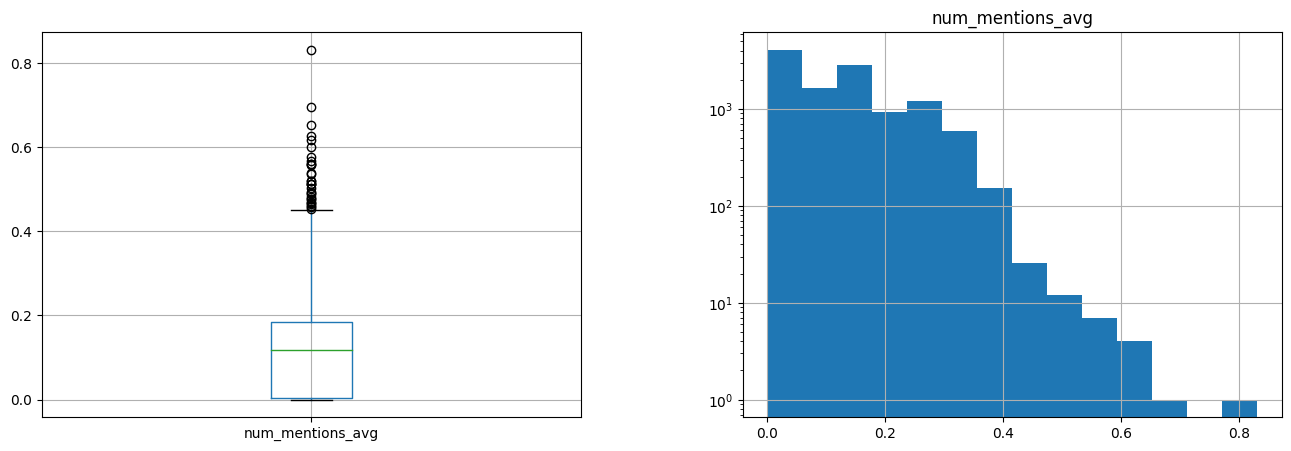

Q1: 0.004589011537005016 Q3: 0.18325732827912306 IQR: 0.17866831674211803
We have 31 outliers over 11508 entries ( 0.2693778241223497 %)
Min outlier: 1.8331595411887383    Max outlier: 5.782608695652174


In [105]:
outliers = analyze_outliers(df_users, "num_mentions_avg")

In [106]:
fill_outliers(df_users, "num_mentions_avg", outliers)

Median:
bot
0    0.486111
1    0.083333
Name: num_mentions_avg, dtype: float64


Number of bins: 14


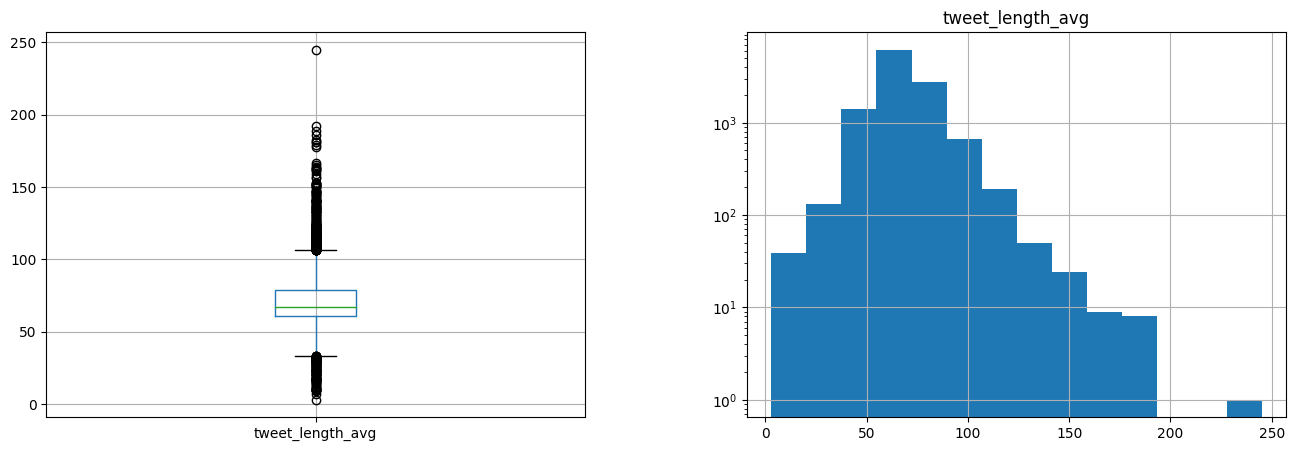

Q1: 60.63472818311874 Q3: 78.87371759429188 IQR: 18.238989411173137
We have 395 outliers over 11508 entries ( 3.43239485575252 %)
Min outlier: 3.0    Max outlier: 245.0


Log scale
Number of bins: 14


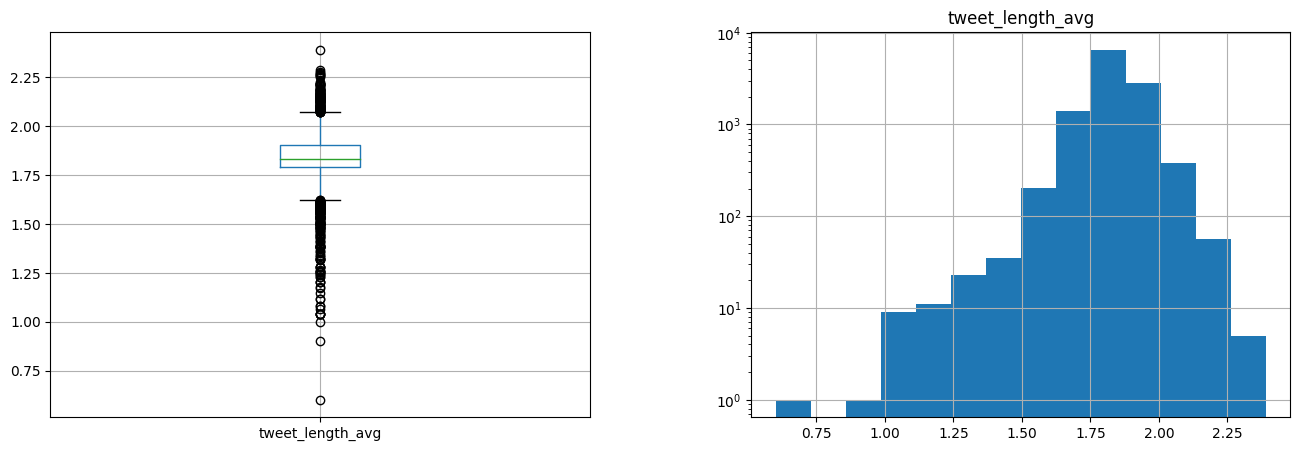

Q1: 1.7898254849915718 Q3: 1.9024038939385144 IQR: 0.1125784089469426
We have 404 outliers over 11508 entries ( 3.5106013208202986 %)
Min outlier: 3.0    Max outlier: 245.0


In [107]:
outliers = analyze_outliers(df_users, "tweet_length_avg")

In [108]:
fill_outliers(df_users, "tweet_length_avg", outliers)

Median:
bot
0    65.233854
1    67.496774
Name: tweet_length_avg, dtype: float64


Number of bins: 14


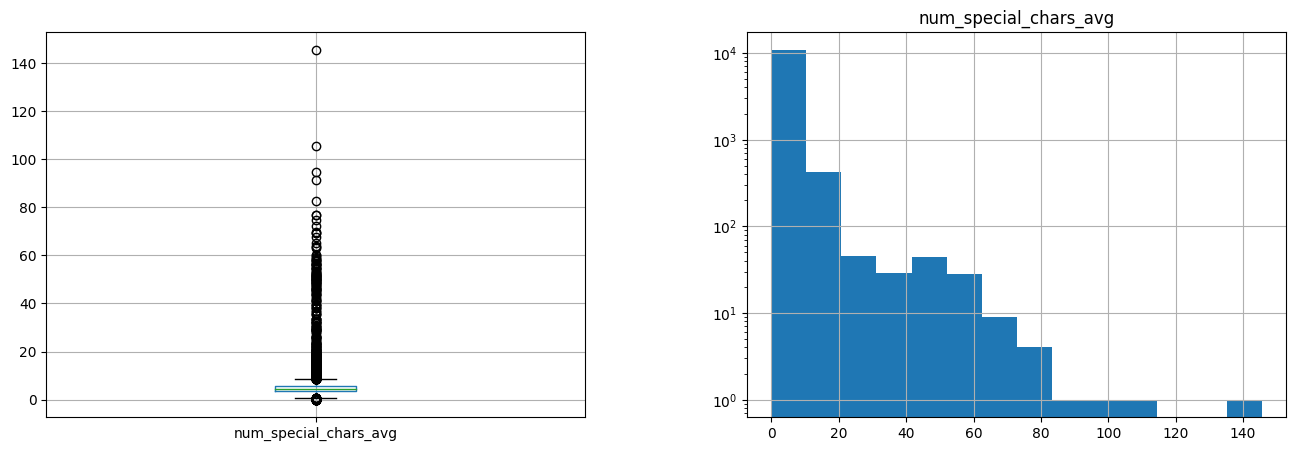

Q1: 3.7227361422273617 Q3: 5.709772857415538 IQR: 1.987036715188176
We have 1052 outliers over 11508 entries ( 9.141466805700382 %)
Min outlier: 0.0    Max outlier: 145.5


Log scale
Number of bins: 14


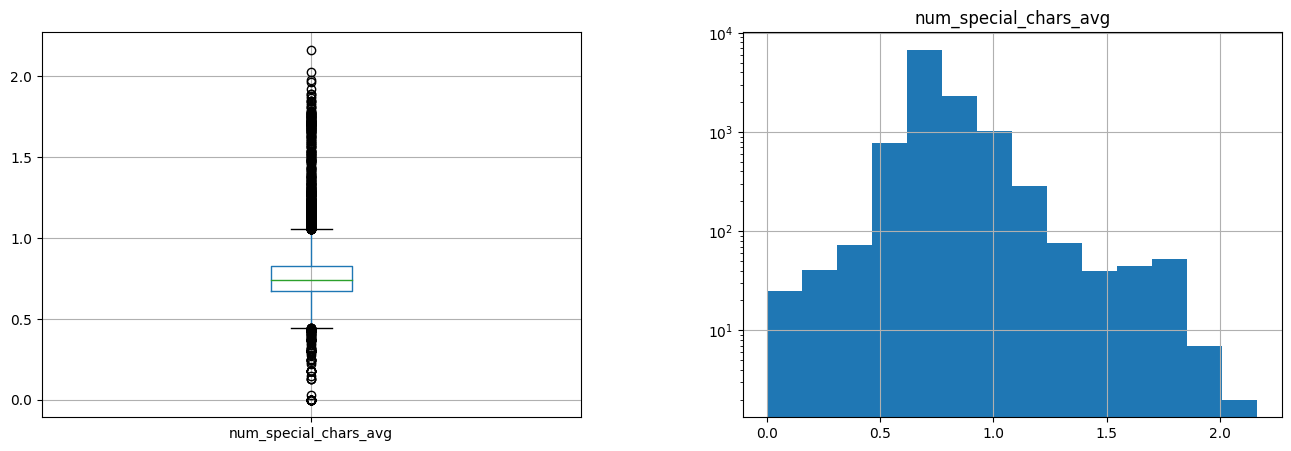

Q1: 0.6741936823211769 Q3: 0.8267078183321702 IQR: 0.15251413601099328
We have 710 outliers over 11508 entries ( 6.1696211331247826 %)
Min outlier: 0.0    Max outlier: 145.5


In [109]:
outliers = analyze_outliers(df_users, "num_special_chars_avg")

In [110]:
fill_outliers(df_users, "num_special_chars_avg", outliers)

Median:
bot
0    4.287375
1    4.348107
Name: num_special_chars_avg, dtype: float64


Number of bins: 14


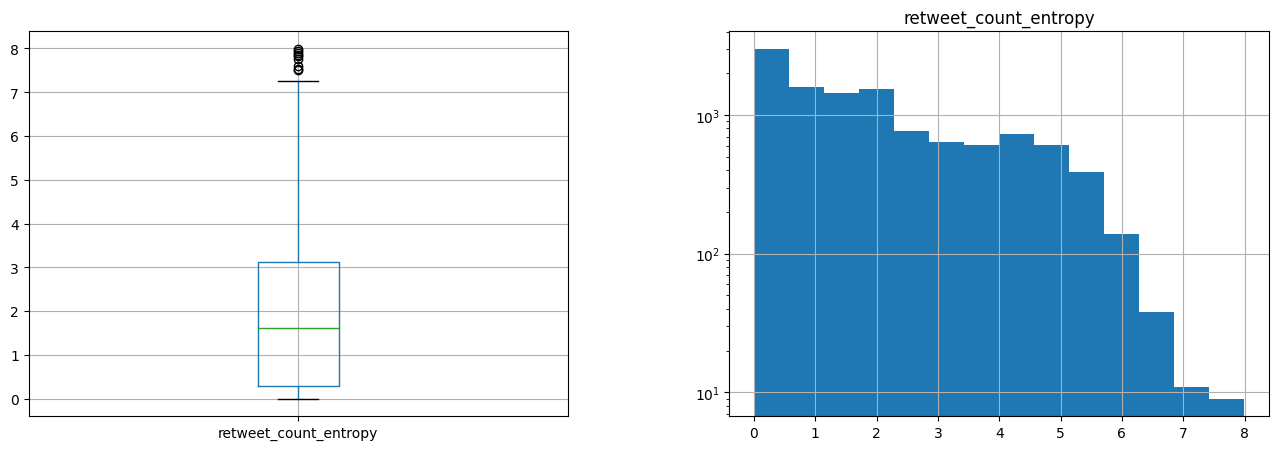

Q1: 0.28809526829855914 Q3: 3.1241809428001543 IQR: 2.836085674501595
We have 9 outliers over 11508 entries ( 0.07820646506777894 %)
Min outlier: 7.514597920738626    Max outlier: 7.992864636584149


Log scale
Number of bins: 14


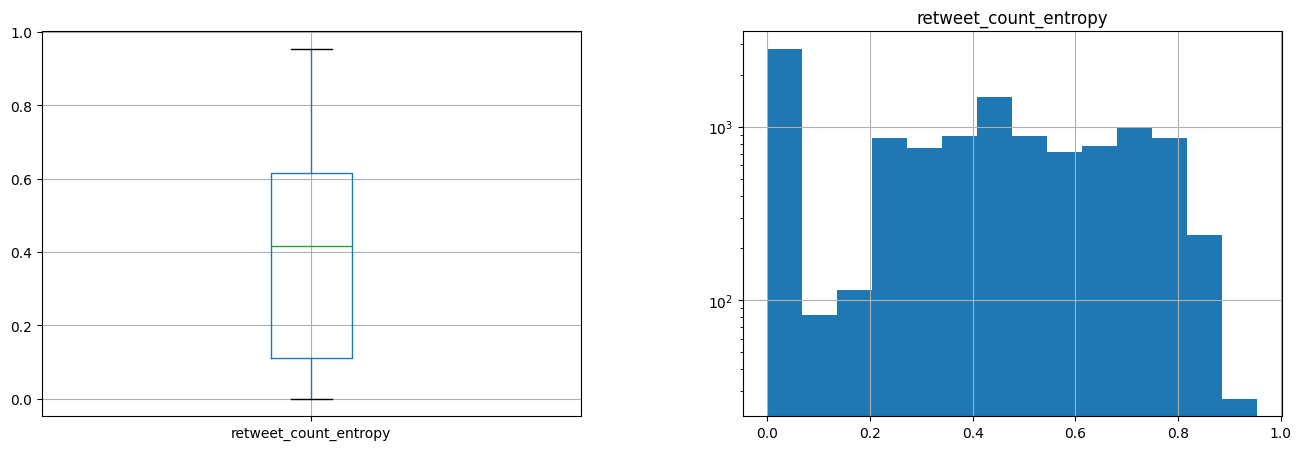

Q1: 0.10994797715977765 Q3: 0.6153377102847293 IQR: 0.5053897331249516
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [111]:
outliers = analyze_outliers(df_users, "retweet_count_entropy")

In [112]:
fill_outliers(df_users, "retweet_count_entropy", outliers)

Median:
bot
0    2.406427
1    1.098612
Name: retweet_count_entropy, dtype: float64


Number of bins: 14


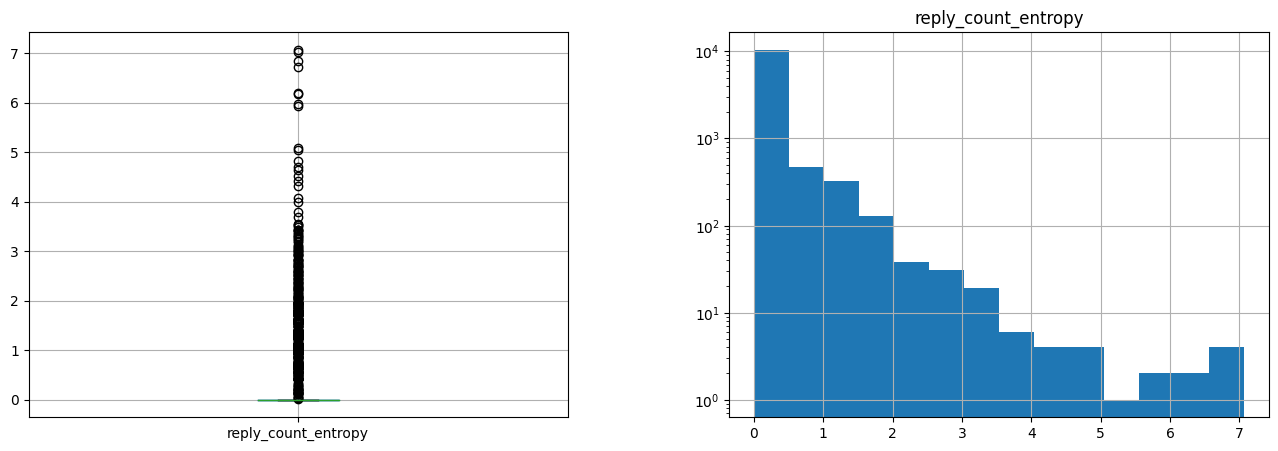

Q1: 0.0 Q3: 0.0 IQR: 0.0
We have 1077 outliers over 11508 entries ( 9.358706986444213 %)
Min outlier: 0.010278343521565274    Max outlier: 7.069189440173885


Log scale
Number of bins: 14


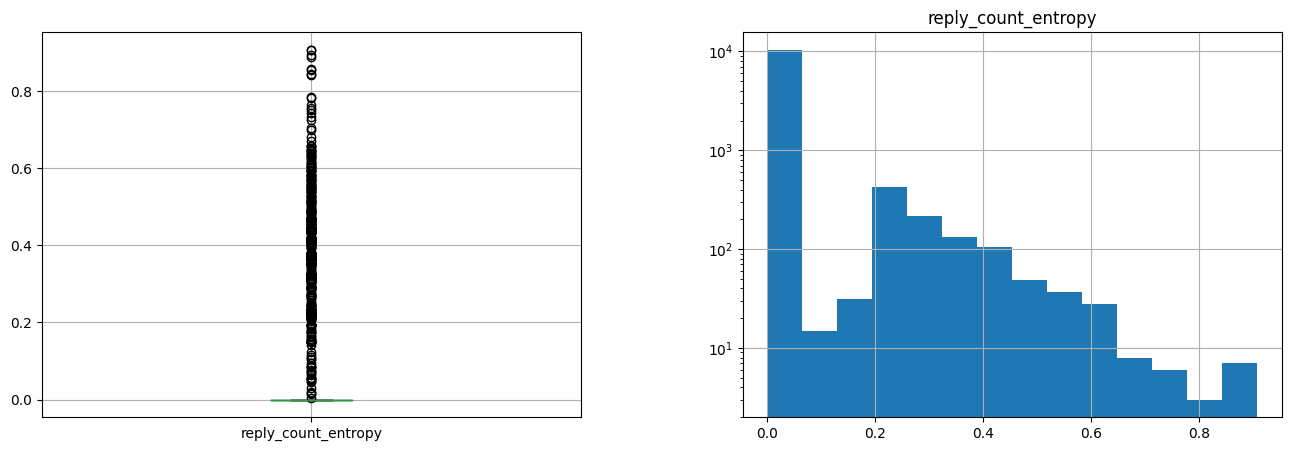

Q1: 0.0 Q3: 0.0 IQR: 0.0
We have 1077 outliers over 11508 entries ( 9.358706986444213 %)
Min outlier: 0.010278343521565274    Max outlier: 7.069189440173885


In [113]:
outliers = analyze_outliers(df_users, "reply_count_entropy")

In [114]:
fill_outliers(df_users, "reply_count_entropy", outliers)

Median:
bot
0    0.0
1    0.0
Name: reply_count_entropy, dtype: float64


Number of bins: 14


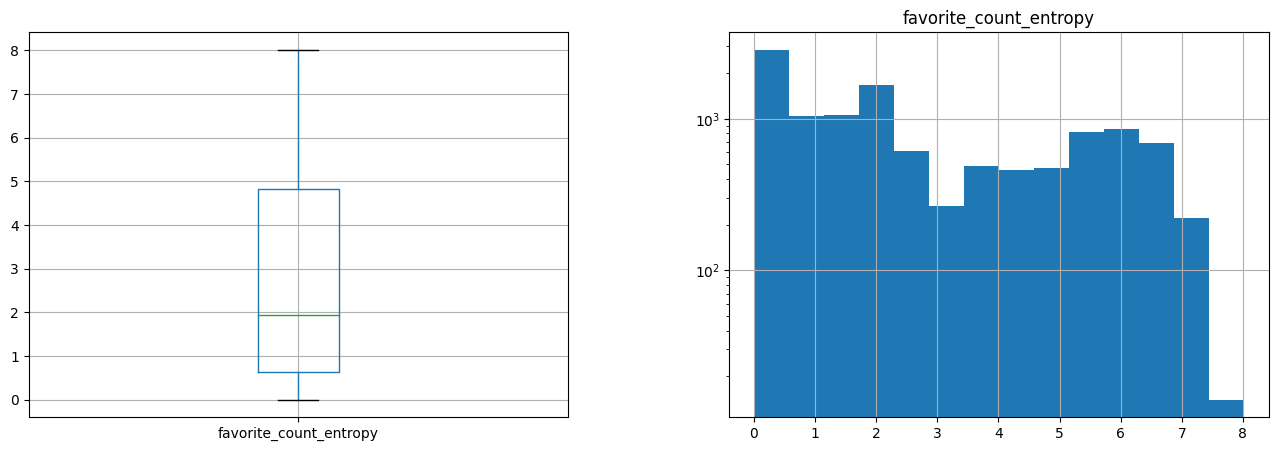

Q1: 0.6365141682948128 Q3: 4.835514037125128 IQR: 4.198999868830315
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


Log scale
Number of bins: 14


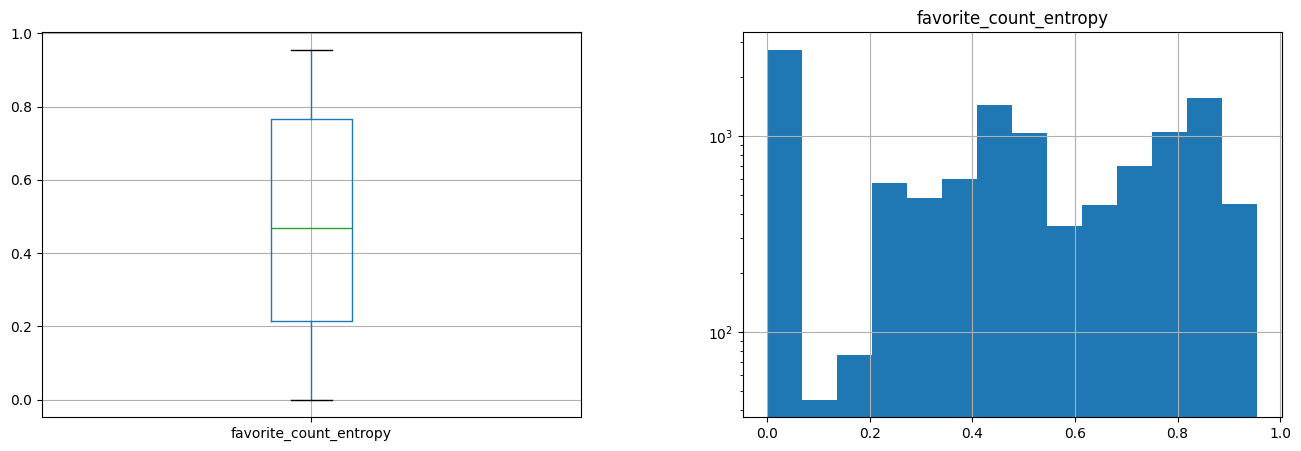

Q1: 0.2139197696107931 Q3: 0.7660791179411185 IQR: 0.5521593483303254
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [115]:
outliers = analyze_outliers(df_users, "favorite_count_entropy")

Number of bins: 14


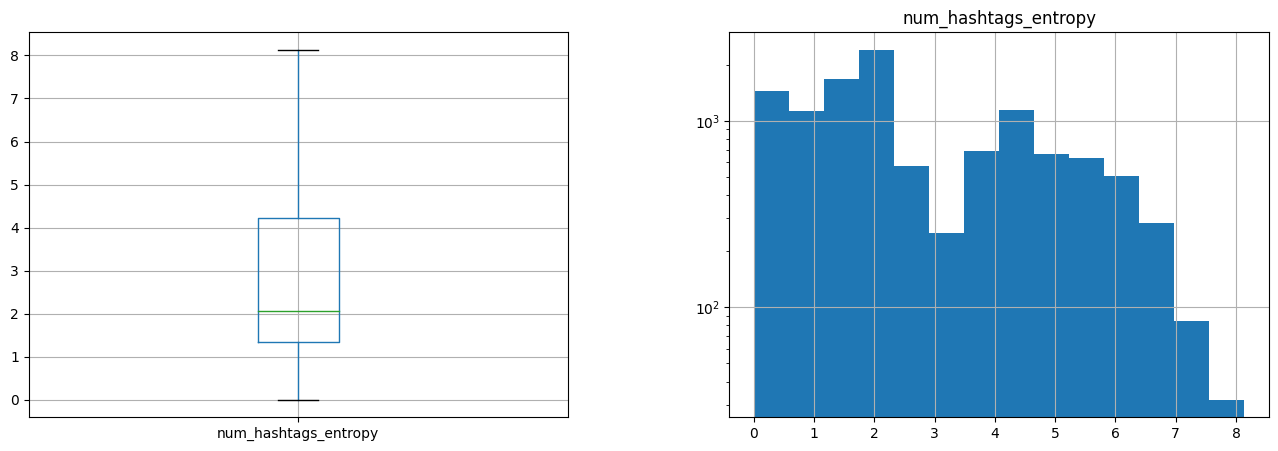

Q1: 1.3321790402101223 Q3: 4.233377952893699 IQR: 2.9011989126835767
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


Log scale
Number of bins: 14


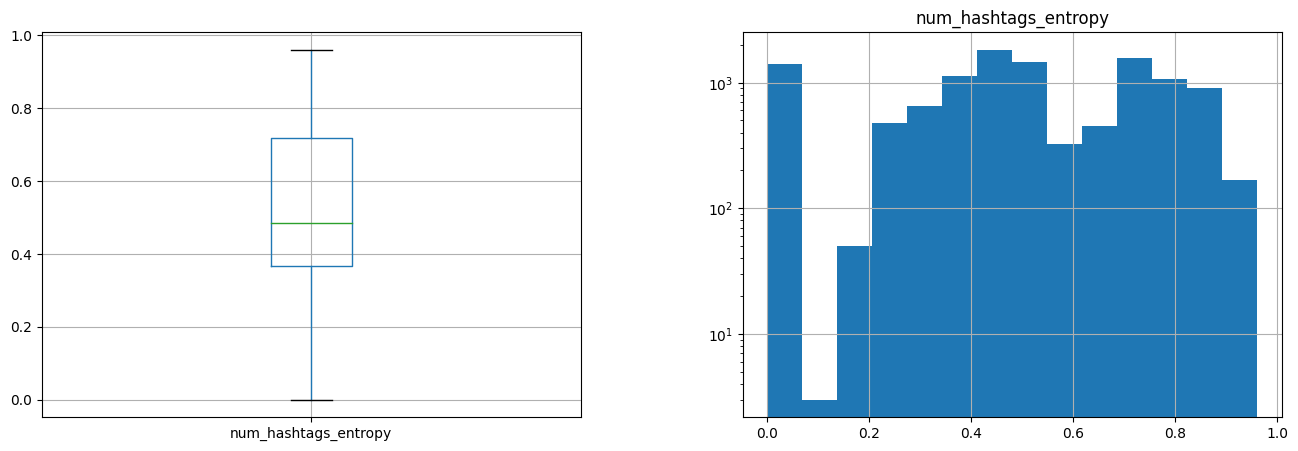

Q1: 0.36776188793541875 Q3: 0.7187821004777665 IQR: 0.3510202125423477
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [116]:
outliers = analyze_outliers(df_users, "num_hashtags_entropy")

Number of bins: 14


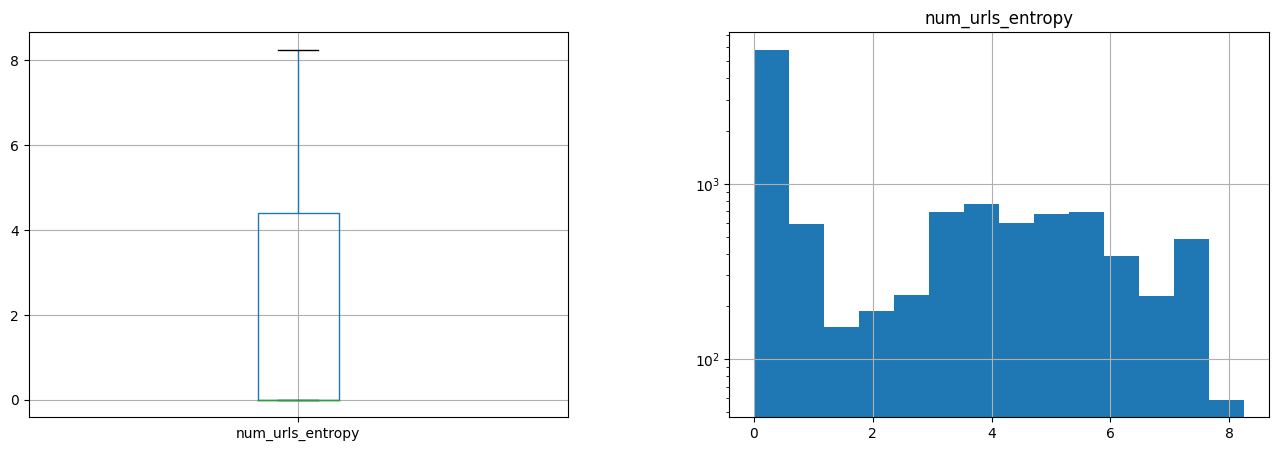

Q1: 0.0 Q3: 4.4067192472642525 IQR: 4.4067192472642525
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


Log scale
Number of bins: 14


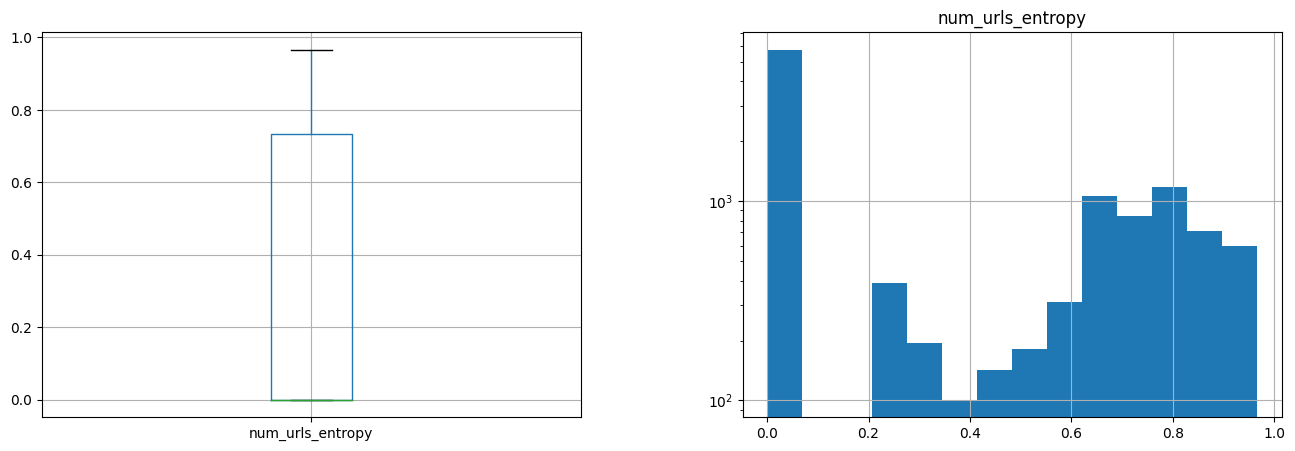

Q1: 0.0 Q3: 0.7329338187101632 IQR: 0.7329338187101632
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [117]:
outliers = analyze_outliers(df_users, "num_urls_entropy")

Number of bins: 14


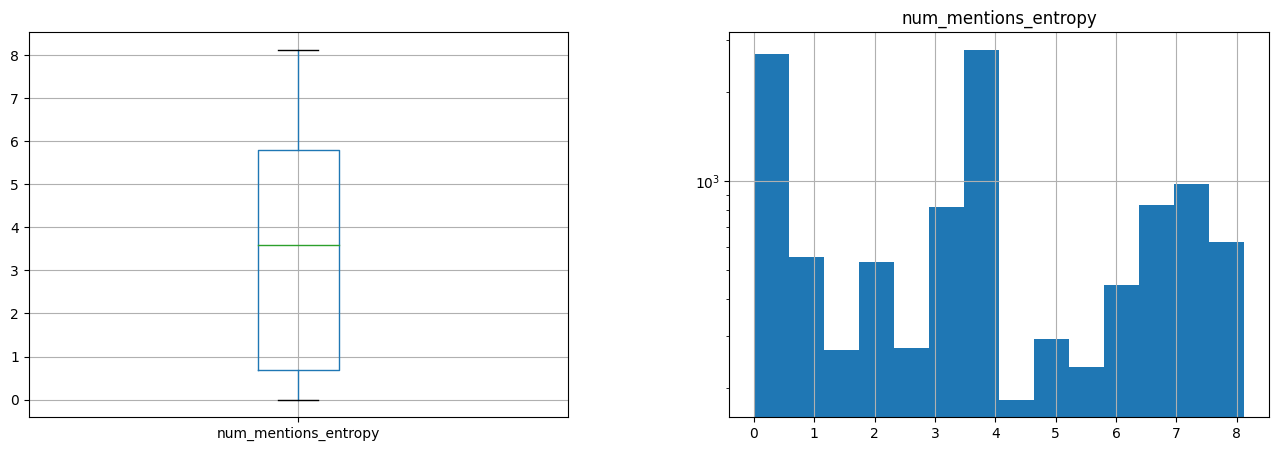

Q1: 0.6931471805599453 Q3: 5.794776405342346 IQR: 5.101629224782401
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


Log scale
Number of bins: 14


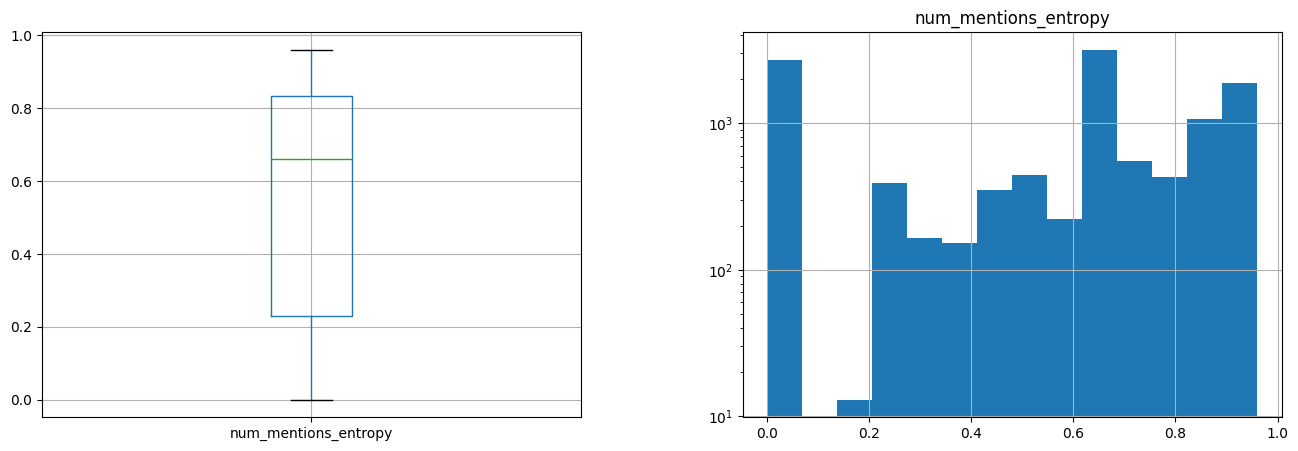

Q1: 0.22869471175735015 Q3: 0.8321751385180767 IQR: 0.6034804267607266
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


In [118]:
outliers = analyze_outliers(df_users, "num_mentions_entropy")

Number of bins: 14


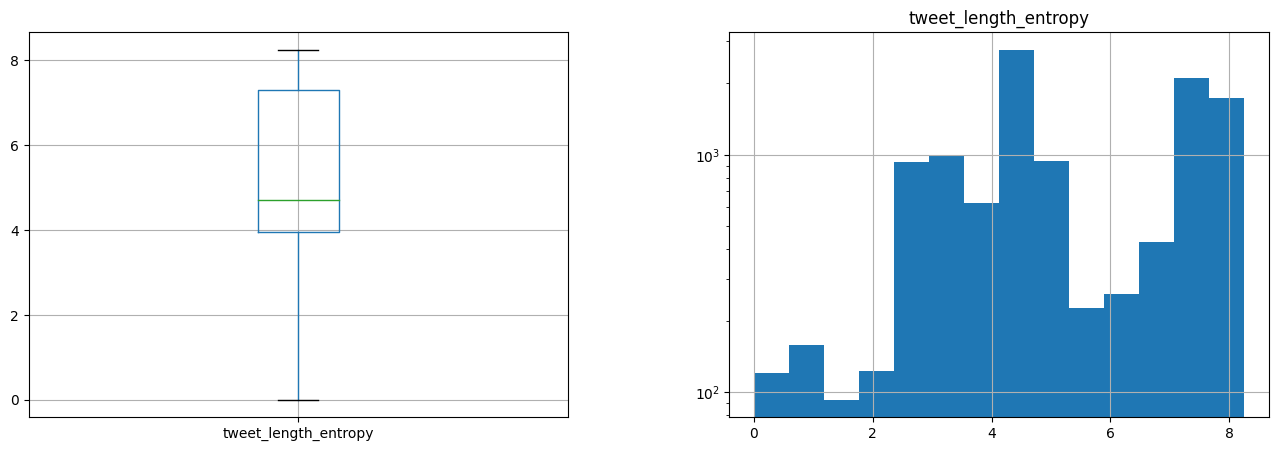

Q1: 3.9612840248007934 Q3: 7.306753567902416 IQR: 3.345469543101623
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


Log scale
Number of bins: 14


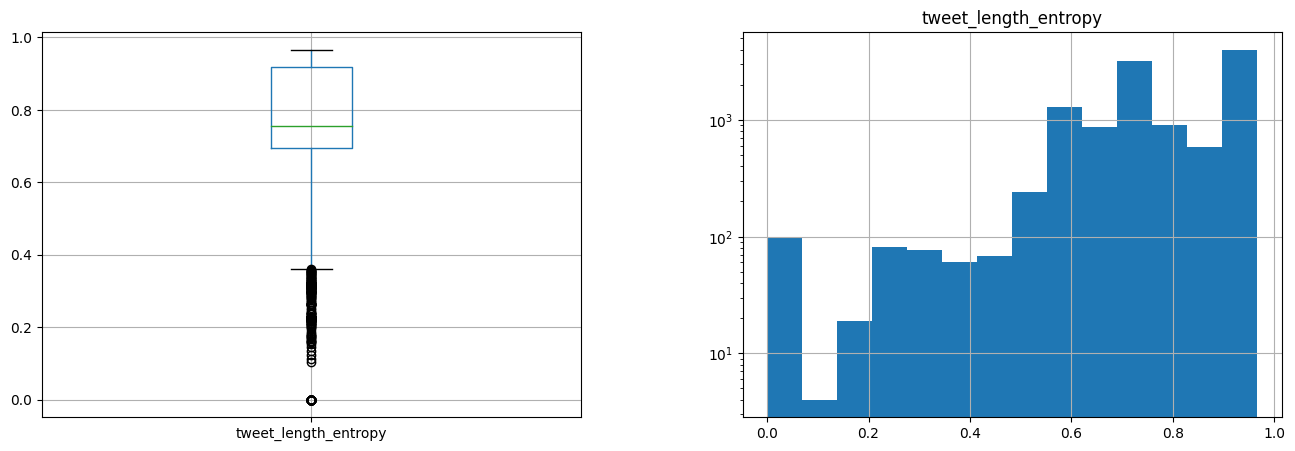

Q1: 0.6955940811453137 Q3: 0.9194313266516352 IQR: 0.22383724550632145
We have 292 outliers over 11508 entries ( 2.537365311087939 %)
Min outlier: 0.0    Max outlier: 1.288236791987254


In [119]:
outliers = analyze_outliers(df_users, "tweet_length_entropy")

Number of bins: 14


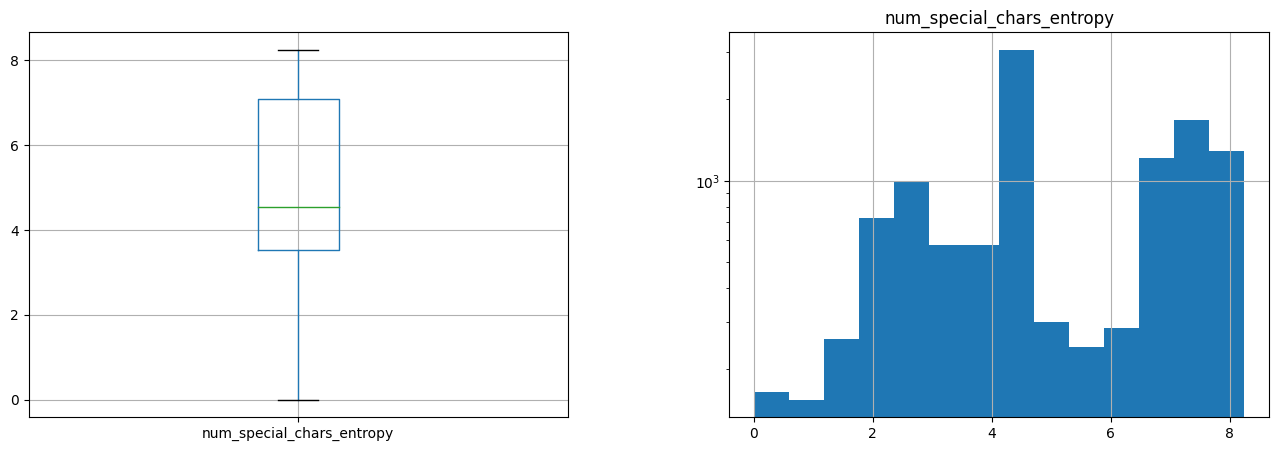

Q1: 3.5335521436013813 Q3: 7.091456512157453 IQR: 3.557904368556072
We have 0 outliers over 11508 entries ( 0.0 %)
Min outlier: nan    Max outlier: nan


Log scale
Number of bins: 14


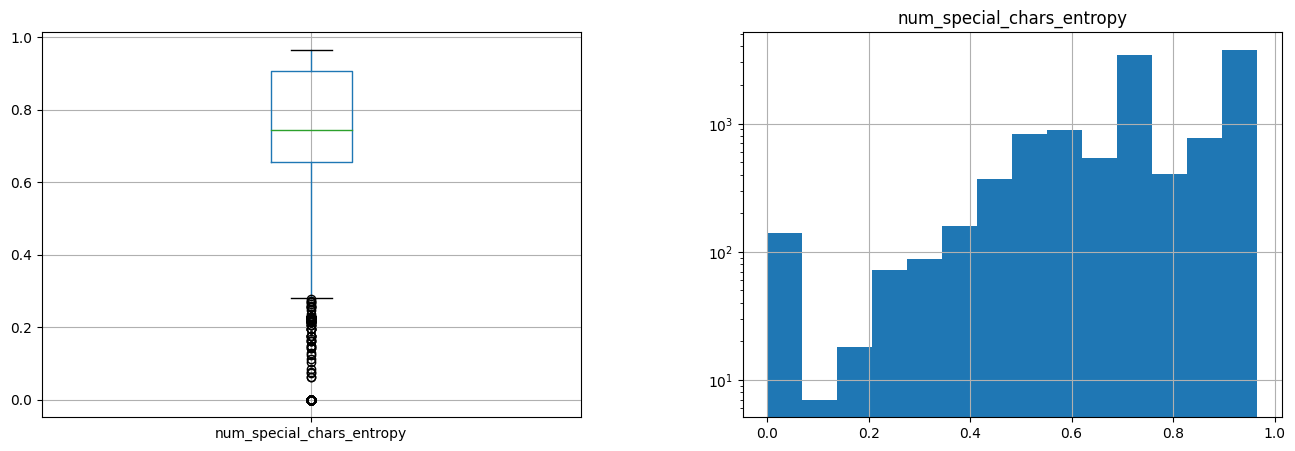

Q1: 0.6564386151628621 Q3: 0.9080267043127721 IQR: 0.25158808914991004
We have 237 outliers over 11508 entries ( 2.059436913451512 %)
Min outlier: 0.0    Max outlier: 0.8953326659680909


In [120]:
outliers = analyze_outliers(df_users, "num_special_chars_entropy")

In [123]:
df_users.describe()

,bot,statuses_count,tweet_count,retweet_count_avg,reply_count_avg,favorite_count_avg,num_hashtags_avg,num_urls_avg,num_mentions_avg,tweet_length_avg,num_special_chars_avg,retweet_count_entropy,reply_count_entropy,favorite_count_entropy,num_hashtags_entropy,num_urls_entropy,num_mentions_entropy,tweet_length_entropy,num_special_chars_entropy
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.0,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.0,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,501.466197,940.685871,24.283149,0.0,0.098865,0.095595,0.026520,0.341209,68.354598,4.548137,1.923118,0.0,2.611871,2.666329,2.145594,3.420989,5.277198,5.014551
std,0.499031,1060.260635,1227.536451,57.096858,0.0,0.128325,0.074136,0.040664,0.324149,13.007232,1.295956,1.708571,0.0,2.306260,1.933728,2.534418,2.603358,1.991733,2.090802
min,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,33.303406,0.750000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,65.000000,0.023810,0.0,0.024031,0.050000,0.000000,0.010623,60.882237,3.728753,0.288095,0.0,0.636514,1.332179,0.000000,0.693147,3.961284,3.533552
50%,1.000000,65.000000,132.000000,0.077850,0.0,0.052632,0.081072,0.000000,0.314815,66.549943,4.330827,1.609438,0.0,1.945910,2.055979,0.000000,3.583519,4.703139,4.537727
75%,1.000000,297.000000,1700.000000,4.146262,0.0,0.098512,0.121951,0.031984,0.486111,75.628622,4.914442,3.116933,0.0,4.835514,4.233378,4.406719,5.794776,7.306754,7.091457
max,1.000000,6227.000000,3926.000000,293.626055,0.0,0.636338,0.350627,0.195280,1.296076,106.206009,8.684211,7.264910,0.0,8.019666,8.135237,8.253388,8.123727,8.253376,8.244368


## Correlation matrix

/tmp/ipykernel_10922/2682159135.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_users.corr()


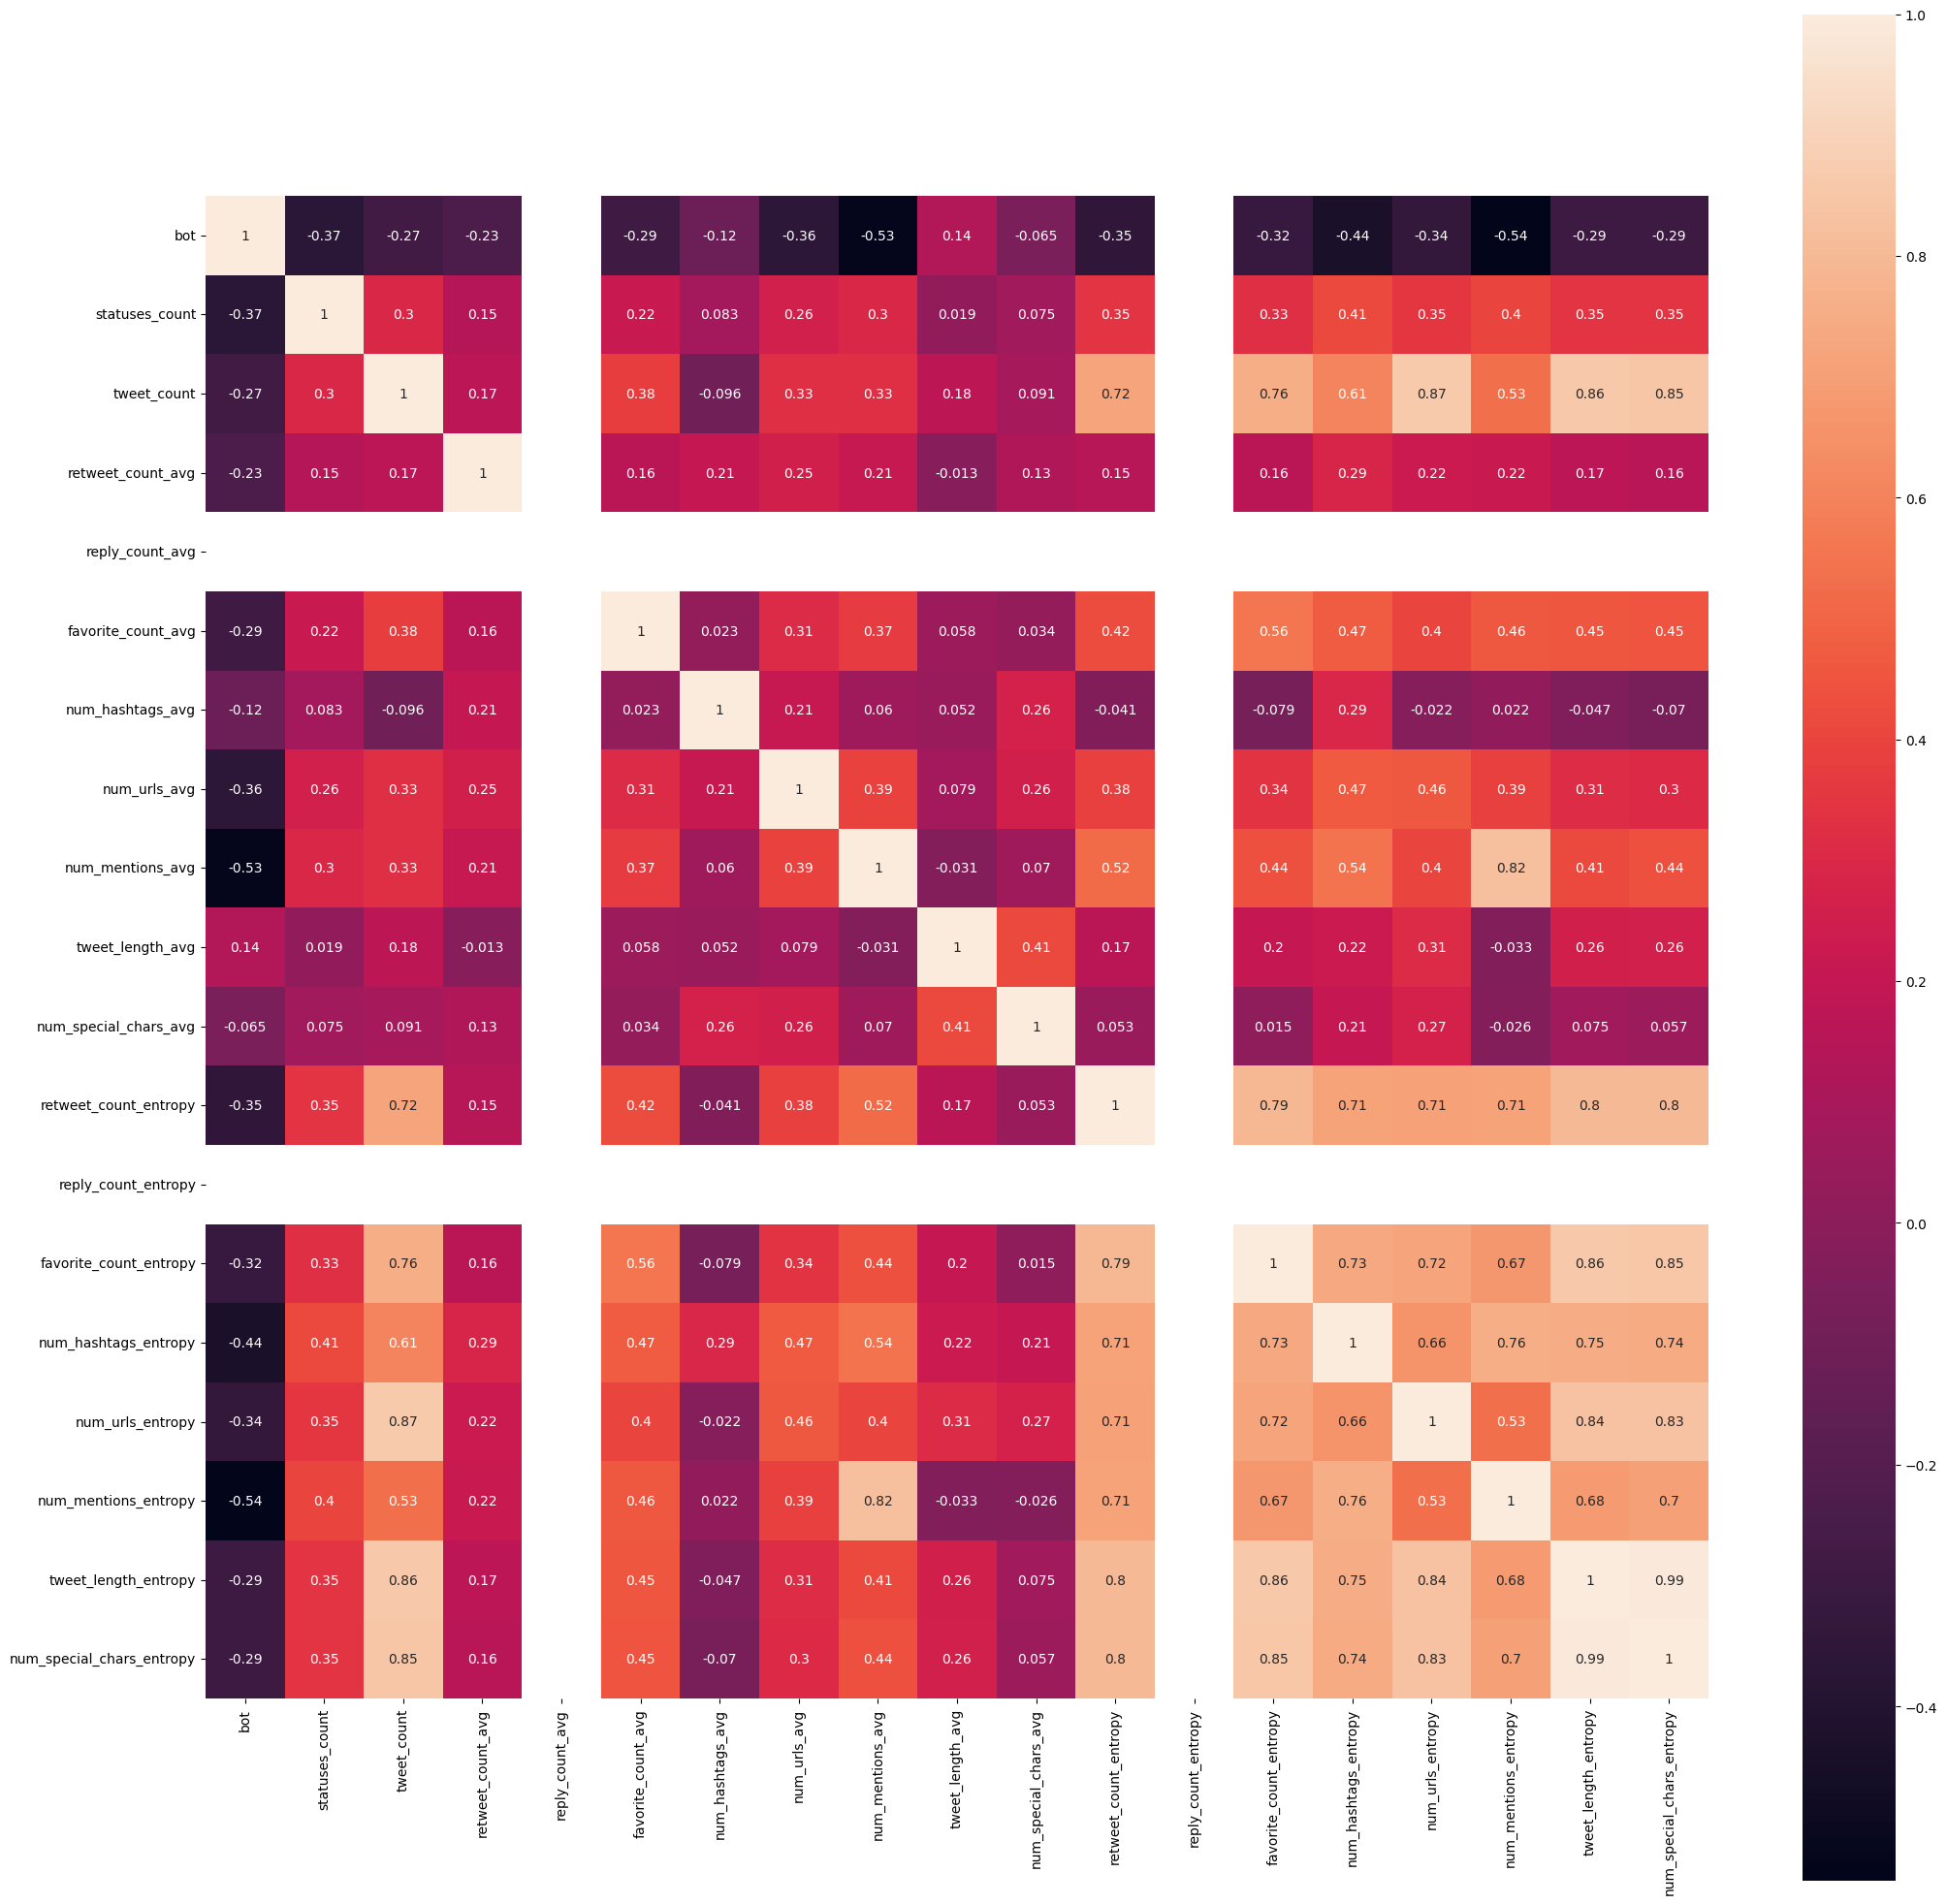

In [122]:
corr_matrix = df_users.corr()
fig, ax = plt.subplots(figsize=(25, 25))         # Sample figsize in inches
mask = np.zeros_like(corr_matrix)
sn.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

# Save on file

In [11]:
#df_users.to_hdf(resultDatasetPath, 'df_tweets', mode='w')

/tmp/ipykernel_10537/87023771.py:1: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['text'], dtype='object')]

  df_tweets.to_hdf(resultDatasetPath, 'df_tweets', mode='w')
